In [76]:
#working on getting the data to fold
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit
import spinmob as s

In [86]:
'''
giving a fitter, returns an array of the fitted lorentzian1 parameters - should add errors

'''
def getFits(my_fitter):
    results = my_fitter.results
    E0 = [results[0][0]]
    gamma = [results[0][1]]
    A = [results[0][2]]
    B = [results[0][3]]
    
    return [E0, gamma, A, B]

'''
folds data on to first 256 channels (LHS<-RHS)
returns: array of [yData, yErrors]
'''
def fold(data_c, dataE):
    center = 256
    data = []
    dataErr = []
    
    for i in range(0, 256):
        data.append(data_c[i]+data_c[-i+1])
        dataErr.append(np.sqrt(dataE[i]+dataE[-i+1]))
    
    return [data, dataErr]

#one lorentzians with offset
def lorentzian(E, E0, gamma, A, b):
    denom = (E-E0)**2 + (gamma/2)**2
    return A*gamma**2/denom + b

#2 lorentzians added together with one offset
def lorentzian2(E, E0, gamma, A, E0_2, gamma_2, A_2, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + b

#6 lorentzians added together with one offset
def lorentzian6(E, E0, gamma, A, E0_2, gamma_2, A_2, E0_3, gamma_3, A_3, E0_4, gamma_4, A_4, E0_5, gamma_5, A_5, E0_6, gamma_6, A_6, b):
    denom = (E-E0)**2 + (gamma/2)**2
    denom_2 = (E-E0_2)**2 + (gamma_2/2)**2
    denom_3 = (E-E0_3)**2 + (gamma_3/2)**2
    denom_4 = (E-E0_4)**2 + (gamma_4/2)**2
    denom_5 = (E-E0_5)**2 + (gamma_5/2)**2
    denom_6 = (E-E0_6)**2 + (gamma_6/2)**2

    return A*gamma**2/denom + A_2*gamma_2**2/denom_2 + A_3*gamma_3**2/denom_3 + A_4*gamma_4**2/denom_4 + A_5*gamma_5**2/denom_5 + A_6*gamma_6**2/denom_6 + b

In [87]:
#testing with stainlessSteel data which only has one peak
data = np.loadtxt(".//data//StainlessSteelFoil_Jan13_fullData.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2

#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]


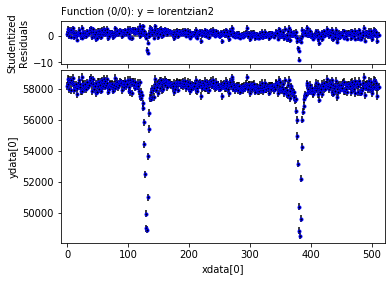

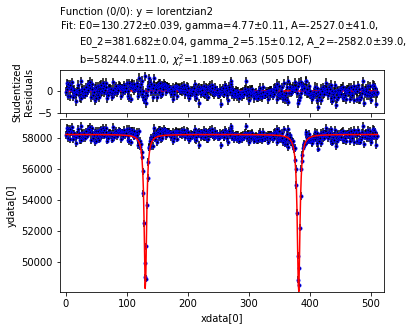


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 2.482 +/- 0.063, 505.0 DOF)
  E0         = 130.0
  gamma      = 5.0
  A          = -2300.0
  E0_2       = 382.0
  gamma_2    = 5.0
  A_2        = -2300.0
  b          = 58000.0

FIT 

In [74]:
# lorentzian2 - for fitting 2
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
# help(s.data.fitter)

my_fitter.set_functions(f=lorentzian2, p='E0=130,gamma=5,A=-2300,E0_2=382,gamma_2=5,A_2=-2300,b=58000')
my_fitter.set_data(xdata=data[0], ydata=data[1], eydata=ydataerr)
my_fitter.fit()

In [75]:
# # fitLS, fitRS

# center = (fitRS[0][0] - fitLS[0][0]) / 2.0 + fitLS[0][0]
# print(center)

# 512/2

# output:
# 255.97671345493336


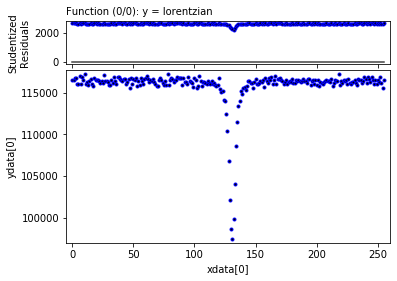

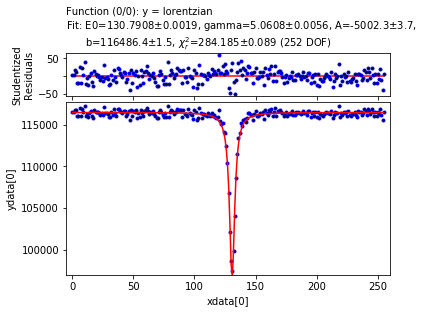


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 7138049.16 +/- 0.089, 252.0 DOF)
  E0         = 130.0
  gamma      = 5.0
  A          = -2300.0
  b          = 58000.0

FIT RESULTS (reduced chi^2 = 284.185 +/- 0.089, 252 DOF)
  E0 

In [73]:
#512 channels
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)
# help(s.data.fitter)
my_fitter.set_functions(f=lorentzian, p='E0=130,gamma=5,A=-2300,b=58000')
my_fitter.set_data(xdata=foldedData[0], ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()

In [93]:
data = np.loadtxt(".//data//Calibration_Jan14_full.Asc", skiprows=0)

data = np.transpose(data)
data[1][511] = (data[1][510] + data[1][0])/2

#folding the data
foldD = fold(data[1], ydataerr)
foldedData = [data[0][0:256], foldD[0], foldD[1]]

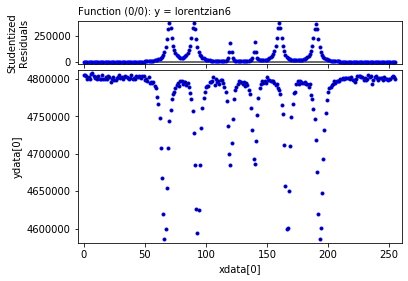

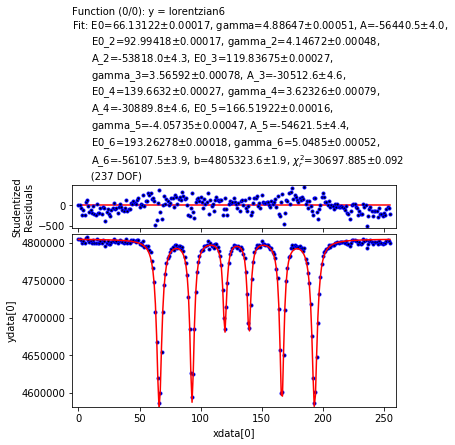


SETTINGS
  autoplot        True
  coarsen         [1]
  first_figure    0
  fpoints         [None]
  plot_all_data   [False]
  plot_bg         [True]
  plot_errors     [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          False
  style_bg        [{'marker': '', 'color': 'k', 'ls': '-'}]
  style_data      [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]
  style_fit       [{'marker': '', 'color': 'r', 'ls': '-'}]
  style_guess     [{'marker': '', 'color': '0.25', 'ls': '-'}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [None]
  xmin            [None]
  xscale          ['linear']
  ylabel          [None]
  ymax            [None]
  ymin            [None]
  yscale          ['linear']

GUESS (reduced chi^2 = 9469867085.485 +/- 0.092, 237.0 DOF)
  E0         = 70.0
  gamma      = 5.0
  A          = -2000000.0
  E0_2       = 90.0
  gamma_2    = 5.0
  A_2        = -2000000.0
  E0_3       = 

In [109]:
my_fitter = s.data.fitter()
my_fitter.set(style_data = [{'marker': '.', 'color': 'black', 'ls': '', 'mec': 'b'}]\
              , plot_guess=False, fpoints=None)

guess = 'E0=70,gamma=5,A=-2e6, E0_2=90, gamma_2=5, A_2=-2e6, E0_3=120, gamma_3=2, A_3=-1e6, E0_4=140, gamma_4=2, A_4=-1e6, E0_5=160, gamma_5=5, A_5=-2e6, E0_6=190, gamma_6=5, A_6=-2e6, b=4.8e6'

my_fitter.set_functions(f=lorentzian6, p=guess)

my_fitter.set_data(xdata=foldedData[0], ydata=foldedData[1], eydata=foldedData[2])
my_fitter.fit()
